그래프비즈 홈페이지

https://graphviz.org/download/

In [1]:
!pip install graphviz

# 결정트리 : 의사결정나무

In [2]:
#%%writefile d:/cancer_classify.py

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


def main():
    # iris 데이터 로드 (1)
    cancer = datasets.load_breast_cancer()

    # 데이터를 훈련, 테스트 데이터로 나누기 (2)
    x_train, x_test, y_train, y_test = train_test_split(cancer.data, 
                cancer.target,
                stratify=cancer.target,
                test_size=0.2,
                random_state=42)



    # 의사결정모델 클래스를 생성
    cancer_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

    # 모델을 학습 (3)
    cancer_model.fit(x_train,y_train)
    print("훈련 점수: {:.3f}".format(cancer_model.score(x_train, y_train)))
    print("테스트 점수: {:.3f}".format(cancer_model.score(x_test, y_test)))

    # DOT 언어의 형식으로 결정 나무의 형태를 출력
    with  open ( 'cancer-dtree.dot' , mode = 'w' ) as f :
        tree.export_graphviz (cancer_model, out_file = f,
                        feature_names=cancer.feature_names, 
                        class_names=["cancer","not cancer"])


if __name__ == '__main__':
    main()

훈련 점수: 0.967
테스트 점수: 0.947


In [3]:
!pip install graphviz

### 위스콘신 주립대학교에서 제공하는 유방암진단 데이터 셋

https://scikit-learn.org/stable/tutorial/machine_learning_map/

# UCI 데이터 셋

https://archive.ics.uci.edu/ml/index.php

### SVM 알고리즘으로 분석하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [5]:
# 유방암 데이터 불러오기

cancer = load_breast_cancer()

In [6]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

malignant.shape, benign.shape

((212, 30), (357, 30))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target)


In [8]:
model = SVC()
model.fit(X_train, y_train)


SVC()

In [9]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

display(train_score, test_score)

0.9131455399061033

0.8881118881118881

In [10]:
pred_y = model.predict(X_test)
pred_y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Text(0, 0.5, 'scale')

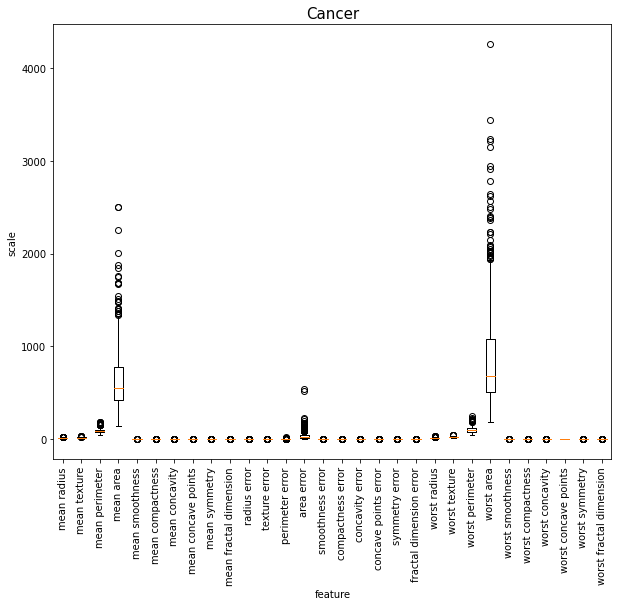

In [11]:
fig = plt.figure(figsize=[10,8])
plt.title('Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('feature')
plt.ylabel('scale')


### Dicision Tree 알고리즘으로 분석하기

In [12]:
import pandas as pd
import numpy as np

### 1단계 : 데이터 준비

In [13]:
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# 외부 데이터 참조시 헤더 여부 체크!!
df = pd.read_csv(uci_path, header=None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


속성 정보 :

1) ID 번호
2) 진단 (M = 악성, B = 양성)
3-32)

각 세포 핵에 대해 10 개의 실수 특성이 계산됩니다 .a

) 반경 (중심에서 주변 지점까지의 거리 평균)
b) 텍스처 (회색조 값의 표준 편차)
c) 둘레
d) 면적
e) 부드러움 (반지름 길이의 국부적 변화)
f) 콤팩트 함 (둘레 ^ 2 / 면적-1.0)
g) 오목 함 (윤곽의 오목 부분의 심각도)
h ) 오목한 점 (윤곽의 오목한 부분의 수)
i) 대칭
j) 프랙탈 차원 ( "해안선 근사치"-1)

In [15]:
# 열이름 지정

df.columns = ['id', 'clump', 'cell_size', 'cell_shape',
             'adhesion', 'epithlial', 'bare_nuclei', 'chromatin',
             'normal_nuclei', 'mitoses', 'class']

In [16]:
pd.set_option('display.max_columns', 15)

### 2단계 : 데이터 탐색

In [17]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
# 데이터 자료형 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             699 non-null    int64 
 1   clump          699 non-null    int64 
 2   cell_size      699 non-null    int64 
 3   cell_shape     699 non-null    int64 
 4   adhesion       699 non-null    int64 
 5   epithlial      699 non-null    int64 
 6   bare_nuclei    699 non-null    object
 7   chromatin      699 non-null    int64 
 8   normal_nuclei  699 non-null    int64 
 9   mitoses        699 non-null    int64 
 10  class          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


#### bare_nuclei 숫자(정수형)으로 변환해준다.
#### bare_nuclei 열에 들어 있는 ? 기호를 처리해준다.

In [19]:
# bare_nuclei 필드 처리 (문자열 -> 정수형)
# bare_nuclei 필드의 고유값 확인
print(df['bare_nuclei'].unique())
# ? 기호를 값없음(np.nan)으로 변경
# replace(찾을값, 변경할값)
df['bare_nuclei'].replace('?', np.nan, inplace=True)
# 누락 데이터 행을 삭제
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
# 문자열을 정수형으로 변환
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
# 정보 확인
df.describe()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 3단계 : 데이터 분류(훈련용/테스트용)

In [20]:
# 설명 변수를 X로 지정 : 훈련용 데이터
X = df[['id', 'clump', 'cell_size', 'cell_shape',
             'adhesion', 'epithlial', 'bare_nuclei', 'chromatin',
             'normal_nuclei', 'mitoses']]

# 예측 변수를 y로 지정 : 테스트용 데이터
y = df['class']

In [21]:
# 설명 변수 데이터를 정규화

from sklearn import preprocessing

# 정규화 공식 = 값 / 전체값의 카운트수
X = preprocessing.StandardScaler().fit(X).transform(X)

In [22]:
print(X)

[[-0.12366418  0.19790469 -0.70221201 ... -0.18182716 -0.61292736
  -0.34839971]
 [-0.11895594  0.19790469  0.27725185 ... -0.18182716 -0.28510482
  -0.34839971]
 [-0.09883306 -0.51164337 -0.70221201 ... -0.18182716 -0.61292736
  -0.34839971]
 ...
 [-0.30297227  0.19790469  2.23617957 ...  1.86073779  2.33747554
   0.22916583]
 [-0.2890233  -0.15686934  1.58320366 ...  2.67776377  1.02618536
  -0.34839971]
 [-0.2890233  -0.15686934  1.58320366 ...  2.67776377  0.37054027
  -0.34839971]]


In [23]:
# 훈련용 / 테스트용으로 7 : 3 비율로 정리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   random_state=10)

print('train_data 개수 : ', X_train.shape)
print('test_data 개수 : ', X_test.shape)

train_data 개수 :  (478, 10)
test_data 개수 :  (205, 10)


### 4단계 : 모델링 ( Decision Tree)

In [24]:
# 결정트리 분류 모델 호출하기

from sklearn import tree

In [25]:
# entroy : 각각의 분기점에서 최적의 속성을 찾는다.
# max_depth : 5단계까지 가지치기를 한다.

tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                        max_depth = 5)

In [26]:
# 학습

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
# 예측 2(benign : 양성), 4(malignant : 악성)
y_hat = tree_model.predict(X_test)

print("예측값: ", y_hat[0:10])
print()
print("정답  : ", y_test.values[0:10])

예측값:  [4 4 4 4 4 4 2 2 4 4]

정답  :  [4 4 4 4 4 4 2 2 4 4]


In [28]:
# 성능평가 : Confusion Matrix 계산

from sklearn import metrics

tree_matrix = metrics.confusion_matrix(y_test, y_hat)

tree_matrix

array([[127,   4],
       [  2,  72]], dtype=int64)

- 양성을 정확히 예측한 TP :  127개
- 양성을 악성으로 잘못 예측한 FP : 4개
- 악성을 양성으로 잘못 예측한 FN : 2개
- 악성을 정확히 예측한  TN : 72개

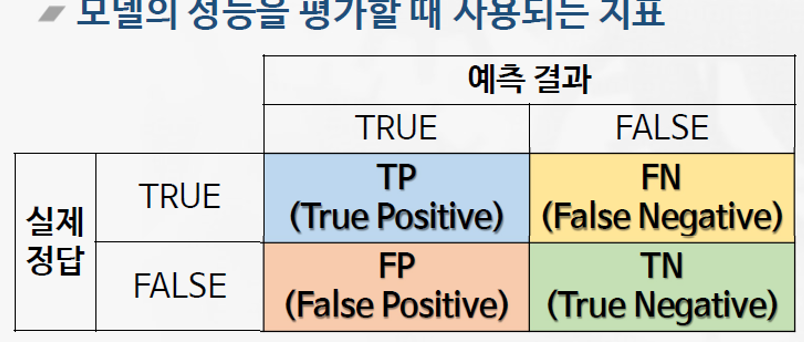

In [29]:
#  보고서 : 평가지표 계산

tree_report = metrics.classification_report(y_test, y_hat)

print(tree_report)

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# 실습 : 서울시 행정구역 분류하기

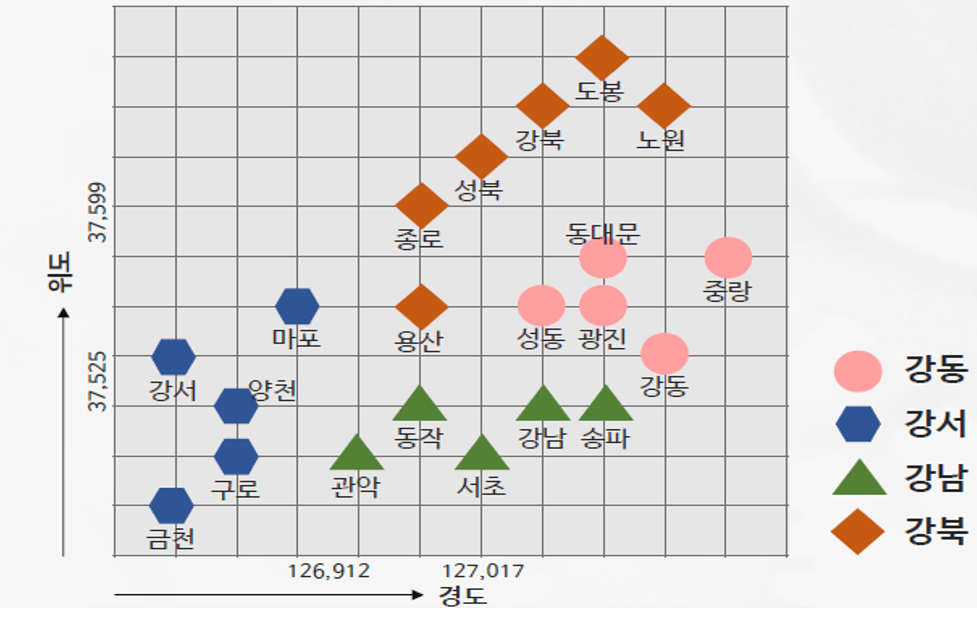

In [30]:
import pandas as pd

### 데이터 수집

서울시 행정구/동의 위치 데이터가 필요하다.

- district : 행정구역(서초구, 강남구, 강동구 ........) 분류하는단위
- dong : 구보다 작은 행정구역(서초1동, 서초2동.....) 분류하는 단위
- latitude : 위도
- longitude : 경도
- label : 한강을 기준으로 동/서/남/북 을 구분한 지역 명칭

In [31]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)

train_df = train_df[['district', 'latitude', 'longitude', 'label']]

In [32]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)

test_df = test_df[['dong', 'latitude', 'longitude', 'label']]

### 학습 레이블 분포도 확인

In [33]:
train_df.label.value_counts()

Gangnam     5
Gangseo     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

### 테스트 레이블 분포도 확인

In [34]:
test_df.label.value_counts()

Gangnam     5
Gangseo     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

# 데이터 전처리 (Preprocessing)

In [35]:
# 위도/경도 평균 및 표준편차를 확인

train_df.describe()

,latitude,longitude
count,20.000000,20.000000
mean,37.547909,126.999772
std,0.055086,0.089387
min,37.451900,126.849500
25%,37.510177,126.913481
50%,37.552597,127.028844
75%,37.573690,127.056458
max,37.668800,127.151405


의사결정나무는 각각의 특징을 독립적으로 사용하기 때문에
별다른 전처리 과정이 필요가 없다.

In [36]:
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [37]:
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


### 데이터 시각화

### http://seaborn.pydata.org/index.html

In [38]:
# 그래프 한글 오류 해결

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':   # 애플 OS : MAC용
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':   # MS OS : 윈도우용
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

Text(0.5, 1.0, '서울시 행정구역')

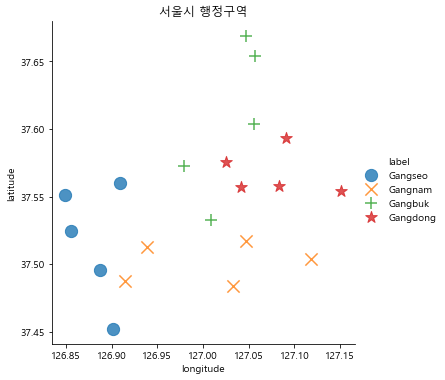

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings(action='ignore')

# 위도/경도 데이터 시각화
# fit_reg : 라인 없음
# scatter_kws : 좌표상 점의 크기
# markers : 동, 서, 남, 북의 기호 지정
sns.lmplot(x='longitude', y='latitude', data=train_df,
          fit_reg=False, 
          scatter_kws= {'s' : 150},
          markers = ['o', 'x', '+', '*'],
          hue = 'label')
# 제목
plt.title('서울시 행정구역')

### 데이터 처리

학습 및 테스트에 필요없는 구이름 필드와 동이름 필드를 제거한다.

In [40]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

### 모델링

In [41]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action='ignore')

In [42]:
# LabelEncoder 는 문자열을 숫자형으로 변환

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

#### 의사결정나무를 시각화해주는 함수 생성

In [43]:
def display_decision_surface(clf, X, y) :
    # 챠트 범위안에 모든 학습 데이터가 포함되도록 한다.
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors) :
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude,
                   X.loc[idx].latitude,
                   c=color,
                   label = le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black',
                   s=200)
    
    # 챠트 제목
    plt.title('Decision Tree 2D Plane', fontsize=20)
    
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0., fontsize=14)
    
    # x축 이름과 폰트 설정
    plt.xlabel('longitude', fontsize=16)
    
    # y축 이름과 폰트 설정
    plt.ylabel('latitude', fontsize=16)
    
    # 챠트 크기 설정
    plt.rcParams['figure.figsize'] = [7, 5]
    
    # x 축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize'] = 14
    
    # y 축 좌표상의 폰트 크기 설정
    plt.rcParams['ytick.labelsize'] = 14
    
    # 챠트 출력
    plt.show()

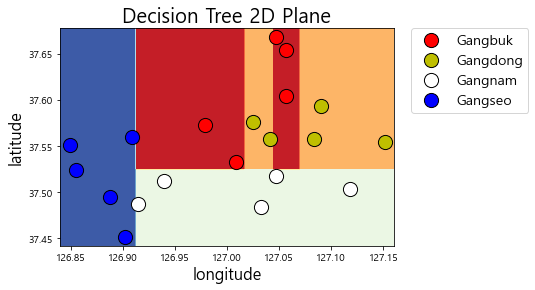

In [44]:
display_decision_surface(clf, X_train, y_encoded)

의사결정나무는 과대적합(오버피팅)이 되기 쉬운 모델링이다.

별도의 파라미터(값)을 설정해주지 않으면 최대한 학습모델에만 맞추어 모델링이 된다.

#### 설정 파라미터

- 1) max_depth : 트리의 최대 깊이
- 2) min_samples_split : 자식 노드를 가질 수 있는 최소한의 데이터 개수
- 3) mins_samples_leaf : 마지막 리프노드의 최소 데이터 개수
- 4) random_state : 여러번 실행해도 결과를 항상 동일하게 설정한다.

#### 깊이를 4로 설정한 경우

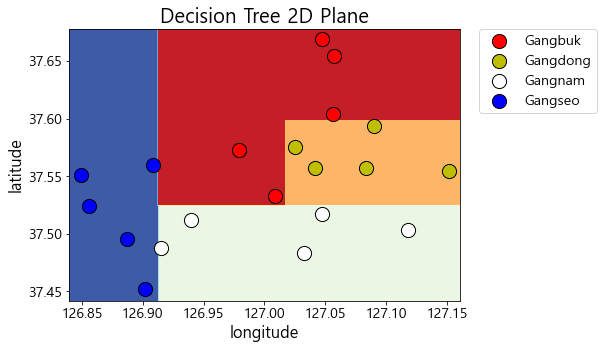

In [45]:
clf = tree.DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2, 
                                  random_state=70).fit(X_train, y_encoded)


display_decision_surface(clf, X_train, y_encoded)

# 그래프 비즈 시각화

In [46]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

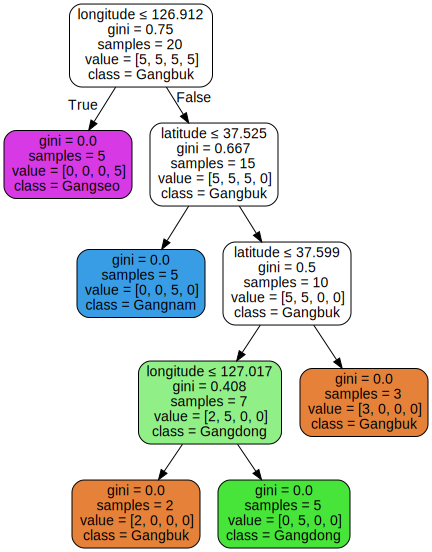

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'seoul'], make sure the Graphviz executables are on your systems' PATH




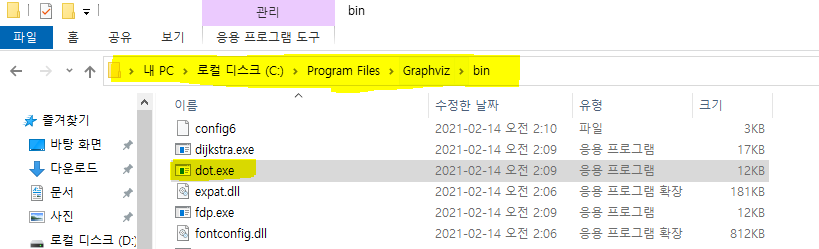

#### 깊이를 3으로 설정한 경우

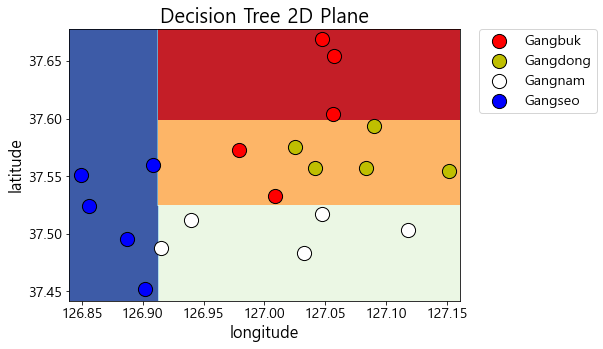

In [48]:
clf = tree.DecisionTreeClassifier(max_depth = 3,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2, 
                                  random_state=70).fit(X_train, y_encoded)


display_decision_surface(clf, X_train, y_encoded)

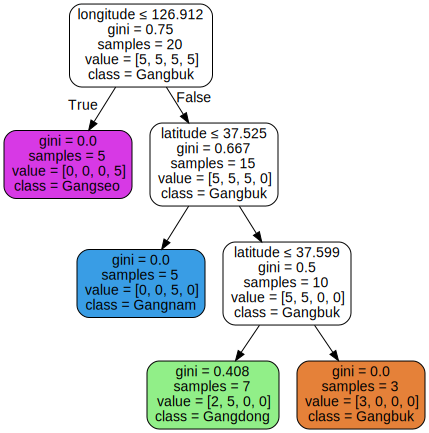

In [49]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('seoul')

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['longitude', 'latitude'],
                               class_names=['Gangbuk','Gangdong','Gangnam','Gangseo'],
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 깊이를 10으로 설정한 경우

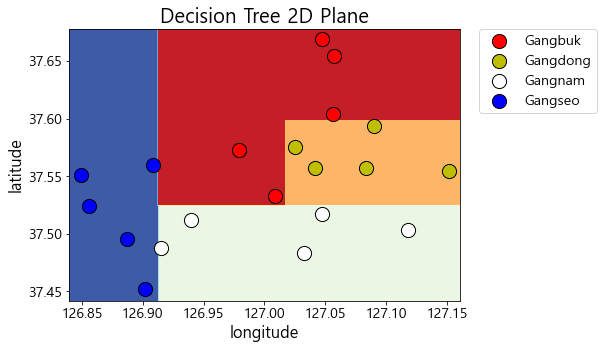

In [50]:
clf = tree.DecisionTreeClassifier(max_depth = 10,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2, 
                                  random_state=70).fit(X_train, y_encoded)


display_decision_surface(clf, X_train, y_encoded)

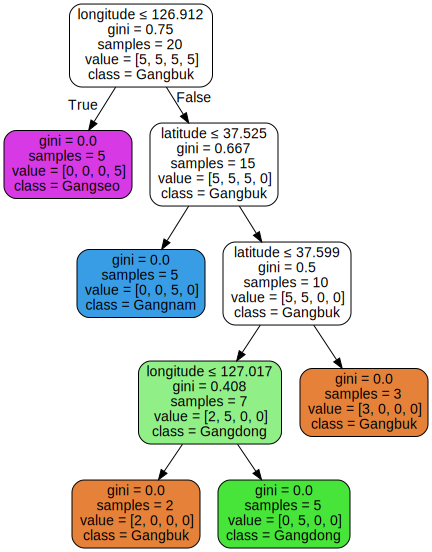

In [51]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 모델 테스트

In [52]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)

print(pred)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


In [53]:
print("정확도: ", accuracy_score(y_test.values.ravel(),
                             le.classes_[pred]))

정확도:  1.0


#### 실제값과 예측값 비교

In [54]:
comparison = pd.DataFrame({'prediction(예측값)' : le.classes_[pred],
                         'ground_truth(실제값)' : y_test.values.ravel()})
comparison

,prediction(예측값),ground_truth(실제값)
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


#### -------------------------------------------------------------------------------------------------

# 붓꽃데이터 결정트리

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [56]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [57]:
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [58]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='iris-tree.dot',
               class_names = iris_data.target_names,
               feature_names = iris_data.feature_names,
               impurity=True, filled=True)

#### 제약이 없는 결정트리 구조

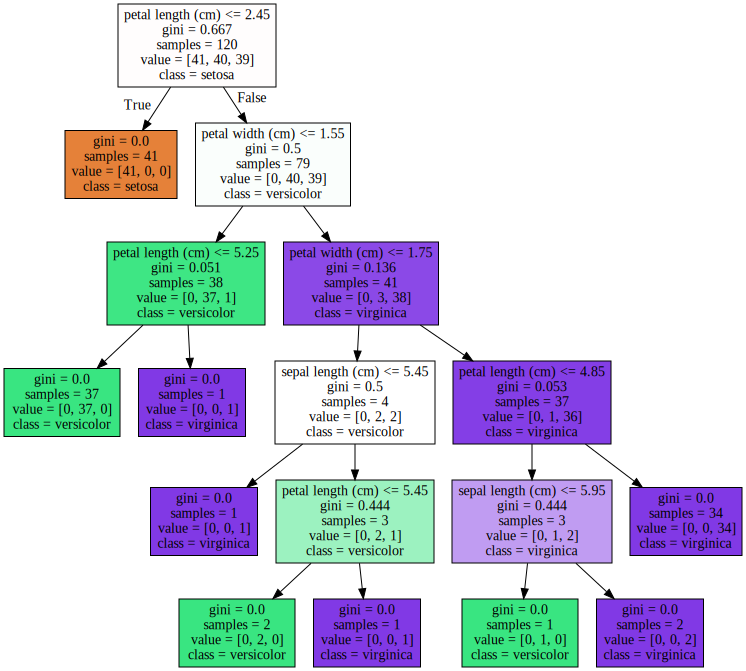

In [59]:
import graphviz

with open('iris-tree.dot') as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 깊이를 3으로 제한하는 결정트리

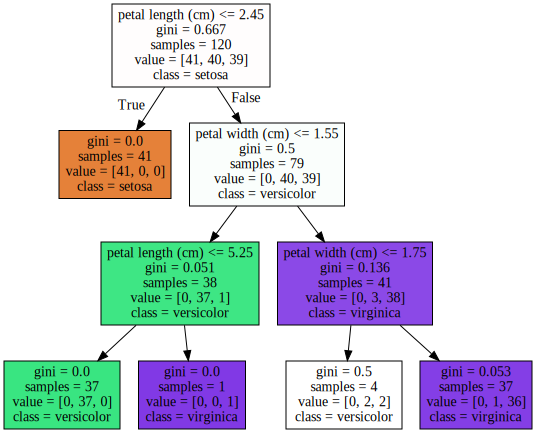

In [60]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='iris-tree-3.dot',
               class_names = iris_data.target_names,
               feature_names = iris_data.feature_names,
               impurity=True, filled=True)

import graphviz

with open('iris-tree-3.dot') as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 깊이를 4로 제한하는 결정트리

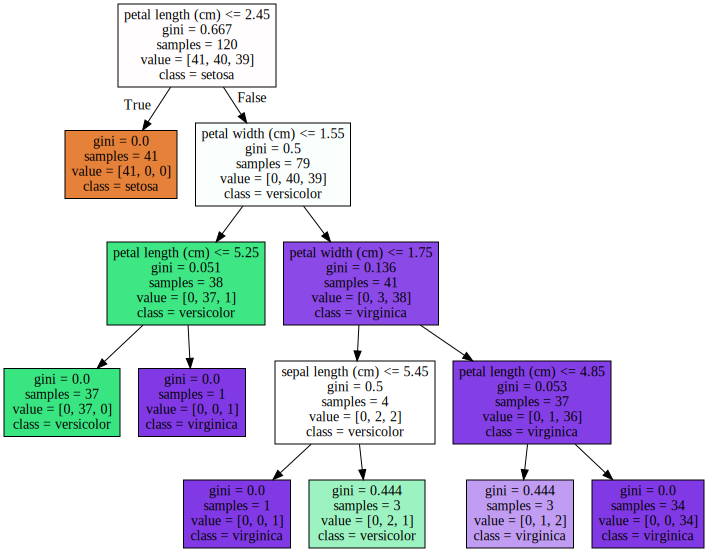

In [61]:
dt_clf = DecisionTreeClassifier( min_samples_split=4, random_state=156)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='iris-tree-4.dot',
               class_names = iris_data.target_names,
               feature_names = iris_data.feature_names,
               impurity=True, filled=True)

import graphviz

with open('iris-tree-4.dot') as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

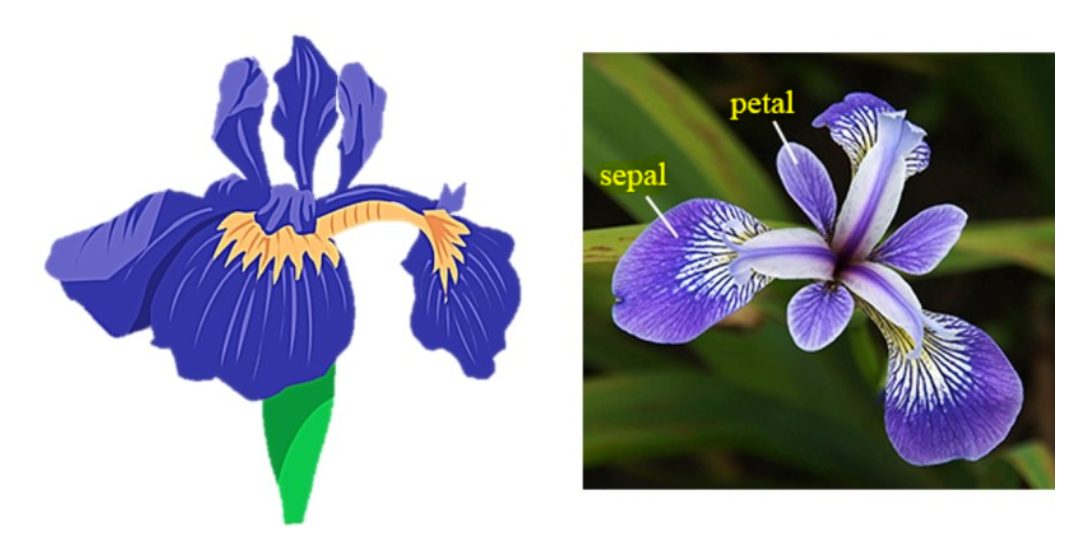

Feature Importances:
[0.009 0.    0.557 0.435]

sepal length (cm): 0.009
sepal width (cm): 0.000
petal length (cm): 0.557
petal width (cm): 0.435


<AxesSubplot:>

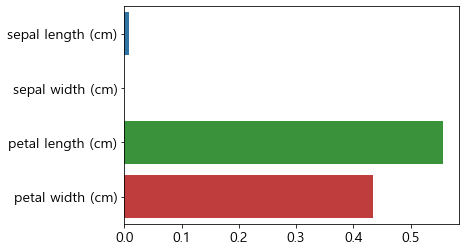

In [62]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature Importances:\n{0}\n".
      format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names,
                      dt_clf.feature_importances_) :
    print('{0}: {1:.3f}'.format(name, value))
    
sns.barplot(x = dt_clf.feature_importances_,
           y = iris_data.feature_names)